# SUPPORT VECTOR CLASSIFICATION

In this project, I will implement a Support Vector Machine algorithm for classification. This type of algorithm classifies output data and makes predictions. The output of this model is a set of visualized scattered plots separated with a straight line.

To do so, I will perform the following tasks:

[**Task 1**](#task1): Importing the libraries and dataset

[**Task 2**](#task2): Pre-processing the data

[**Task 3**](#task3): Feature scaling to normalize the data

[**Task 4**](#task4): Fitting the classifier and making predictions

[**Task 5**](#task5): Confusion Matrix

[**Task 6**](#task6): Visualising the training and testing sets results

<a id = 'task1'></a>
# TASK 1: Importing the libraries and dataset

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib.colors import ListedColormap


Import the dataset

In [2]:
df = pd.read_excel('SVMDataset.xlsx')
# Now decide the input and output variable 
# In the given dataset on the website only third and fourth column were used as input variables.
# and fifth column was used as the output variable.


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<a id = 'task2'></a>
# TASK 2 : Pre-processing the data

Splitting the data into dependent and independent variables

In [4]:
X = df.drop(['User ID','Gender', 'Purchased'], axis = 1).copy()
Y = df['Purchased'].copy()

A different way to split the data into dependent and independent variables.


In [5]:
#X = df.iloc[:,[2,3]].values
#Y = df.iloc[:,4].values

Splitting the dataset

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)

In [7]:
X_test.shape

(100, 2)

<a id = 'task3'></a>
# TASK 3 : Feature Scaling

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id = 'task4'></a>
# TASK 4 : Fitting the classifier and making predictions

In [9]:
svmclassifier = SVC(kernel = 'linear')
ac=svmclassifier.fit(X_train, Y_train)

In [10]:
print(svmclassifier.coef_)
print(svmclassifier.intercept_)
print(svmclassifier.classes_)
print(svmclassifier.class_weight_)
print(svmclassifier.fit_status_)
print(svmclassifier.support_vectors_.shape)
print(svmclassifier.n_support_)

[[1.65576783 1.02616955]]
[-0.84925708]
[0 1]
[1. 1.]
0
(118, 2)
[59 59]


## Predicting the test set results

In [11]:
Y_pred = svmclassifier.predict(X_test)

<a id = 'task5'></a>
# TASK 5 : Confusion Matrix

 First method

In [12]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[61  6]
 [12 21]]


Second method

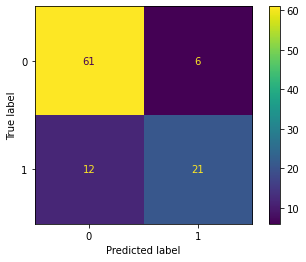

In [13]:
plot_confusion_matrix(ac,X_test,Y_test)

<a id = 'task6'></a>
# TASK 6 : Visualization

## Visualizing the training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


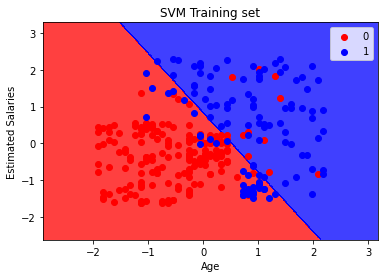

In [14]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, svmclassifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red','blue'))(i), label = j)
    
plt.title('SVM Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salaries')
plt.legend()
plt.show()


## Visualizing the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


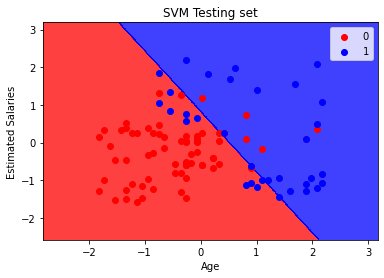

In [15]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, svmclassifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red','blue'))(i), label = j)
    
plt.title('SVM Testing set')
plt.xlabel('Age')
plt.ylabel('Estimated Salaries')
plt.legend()
plt.show()